<a href="https://colab.research.google.com/github/akhiluthappa1/data_science/blob/main/Akhil_Uthappa_Assignment_8_Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv", sep=",")
print(df.to_string())

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.000        0                       582         0                 20                    1  265000.00              1.90           130    1        0     4            1
1    55.000        0                      7861         0                 38                    0  263358.03              1.10           136    1        0     6            1
2    65.000        0                       146         0                 20                    0  162000.00              1.30           129    1        1     7            1
3    50.000        1                       111         0                 20                    0  210000.00              1.90           137    1        0     7            1
4    65.000        1                       160         1                 20                    0  327000.00              2.70          

### 1. load the data into Pandas dataframe. Extract two dataframes with the above 4 features: df 0 for surviving patients (DEATH EVENT = 0) and df 1 for deceased patients (DEATH EVENT = 1)

In [3]:
df_0 = df[df['DEATH_EVENT']==0]
df_1 = df[df['DEATH_EVENT']==1]
df_00 = df_0[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets', 'DEATH_EVENT']]
df_01 = df_1[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets', 'DEATH_EVENT']]
df_0 = df_0[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]
df_1 = df_1[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]

### 2. for each dataset, construct the visual representations of correponding correlation matrices M0 (from df 0) and M1 (from df 1) and save the plots into two separate files

In [4]:
df_0_corr = df_0.corr()
df_1_corr = df_1.corr()

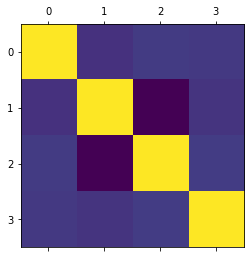

In [5]:
import matplotlib.pyplot as plt
plt.matshow(df_0_corr)
plt.show()

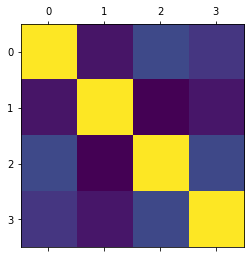

In [6]:
plt.matshow(df_1_corr)
plt.show()

### 3. examine your correlation matrix plots visually and answer the following:
(a) which features have the highest correlation for surviving patients?
(b) which features have the lowest correlation for surviving patients?
(c) which features have the highest correlation for deceased patients?
(d) which features have the lowest correlation for deceased patients?
(e) are results the same for both cases?

### a) serum_creatinine	and serum_sodium
### b) serum_sodium and creatinine_phosphokinase	
### c) creatinine_phosphokinase and serum_creatinine
### d) serum_sodium and creatinine_phosphokinase
### e) No

### Question 2: Group 4

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

df_0_new = df_0[['platelets', 'serum_creatinine']].copy()
df_1_new = df_0[['platelets', 'serum_creatinine']].copy()
X_train, X_test = train_test_split(df_0_new, test_size=0.5)
Y_train = X_train['serum_creatinine']
X_train = X_train.drop('serum_creatinine', axis=1)
Y_test = X_test['serum_creatinine']
X_test = X_test.drop('serum_creatinine', axis=1)
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

X_train_1, X_test_1 = train_test_split(df_1_new, test_size=0.5)
Y_train_1 = X_train_1['serum_creatinine']
X_train_1 = X_train_1.drop('serum_creatinine', axis=1)
Y_test_1 = X_test_1['serum_creatinine']
X_test_1 = X_test_1.drop('serum_creatinine', axis=1)
reg = LinearRegression().fit(X_train_1, Y_train_1)
Y_pred_1 = reg.predict(X_test_1)

In [45]:
from sklearn.metrics import mean_squared_error
residual = Y_pred - Y_test
RMSE = mean_squared_error(Y_test, Y_pred)
sse = (len(Y_pred)*RMSE)**2
print(sse)

residual = Y_pred_1 - Y_test_1
RMSE = mean_squared_error(Y_test_1, Y_pred_1)
sse_11 = (len(Y_pred_1)*RMSE)**2
print(sse_11)

1791.9146790568416
2233.687767931418


In [46]:
# For Death event 0
model1 = np.polyfit(X_train.values.ravel(), Y_train.values.ravel(), 1)
model1_p = np.poly1d(model1)
print(model1_p)
model2 = np.polyfit(X_train.values.ravel(), Y_train.values.ravel(), 2)
model2_p = np.poly1d(model2)
print(model2_p)
model3 = np.polyfit(X_train.values.ravel(), Y_train.values.ravel(), 3)
model3_p = np.poly1d(model3)
print(model3_p)
model4 = np.polyfit((np.log(X_train)).values.ravel(), Y_train.values.ravel(), 1)
model4_p = np.poly1d(model4)
print(model4_p)
model5 = np.polyfit((np.log(X_train)).values.ravel(), np.log(Y_train.values.ravel()), 1)
model5_p = np.poly1d(model5)
print(model5_p, "\n\n\n")

#For death event 1
model1_1 = np.polyfit(X_train_1.values.ravel(), Y_train_1.values.ravel(), 1)
model1_p_1 = np.poly1d(model1_1)
print(model1_p_1)
model2_1 = np.polyfit(X_train_1.values.ravel(), Y_train_1.values.ravel(), 2)
model2_p_1 = np.poly1d(model2_1)
print(model2_p_1)
model3_1 = np.polyfit(X_train_1.values.ravel(), Y_train_1.values.ravel(), 3)
model3_p_1 = np.poly1d(model3_1)
print(model3_p_1)
model4_1 = np.polyfit((np.log(X_train_1)).values.ravel(), Y_train_1.values.ravel(), 1)
model4_p_1 = np.poly1d(model4_1)
print(model4_p_1)
model5_1 = np.polyfit((np.log(X_train_1)).values.ravel(), np.log(Y_train_1.values.ravel()), 1)
model5_p_1 = np.poly1d(model5_1)
print(model5_p_1)

 
-9.16e-08 x + 1.197
           2
2.948e-12 x - 2.368e-06 x + 1.568
            3             2
-2.191e-17 x + 3.142e-11 x - 1.227e-05 x + 2.55
 
-0.1693 x + 3.278
 
-0.1038 x + 1.359 



 
-2.637e-07 x + 1.27
           2
2.786e-13 x - 4.785e-07 x + 1.304
           3             2
4.409e-19 x - 2.688e-13 x - 2.979e-07 x + 1.287
 
-0.07962 x + 2.187
 
-0.03488 x + 0.5429


In [47]:
#For Death event 0
Y_pred_1 = model1_p(X_test)
Y_pred_2 = model2_p(X_test)
Y_pred_3 = model3_p(X_test)
Y_pred_4 = model4_p(X_test)
Y_pred_5 = model5_p(X_test)

#For Death event 1
Y_pred_1_1 = model1_p_1(X_test_1)
Y_pred_2_1 = model2_p_1(X_test_1)
Y_pred_3_1 = model3_p_1(X_test_1)
Y_pred_4_1 = model4_p_1(X_test_1)
Y_pred_5_1 = model5_p_1(X_test_1)

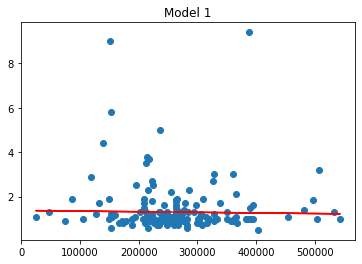

In [33]:
plt.scatter(X_test, Y_test)
plt.title("Model 1- Death event 0")
plt.plot(X_test, Y_pred_1, c = 'r')


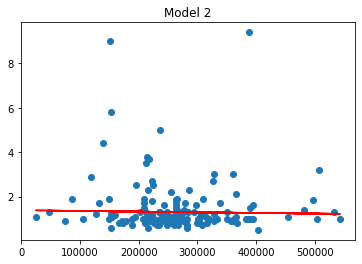

In [34]:
plt.scatter(X_test, Y_test)
plt.title("Model 2- Death event 0")
plt.plot(X_test, Y_pred_2, c = 'r')


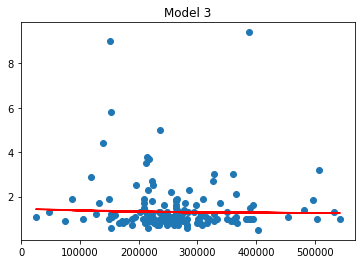

In [35]:
plt.scatter(X_test, Y_test)
plt.title("Model 3- Death event 0")
plt.plot(X_test, Y_pred_3, c = 'r')


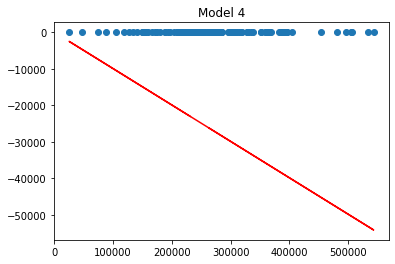

In [37]:
plt.scatter(X_test, Y_test)
plt.title("Model 4- Death event 0")
plt.plot(X_test, Y_pred_4, c = 'r')


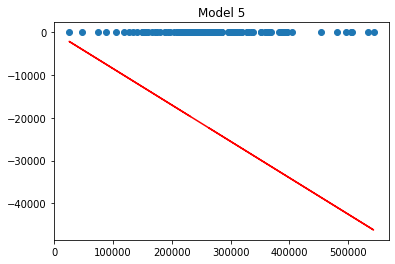

In [38]:
plt.scatter(X_test, Y_test)
plt.title("Model 5- Death event 0")
plt.plot(X_test, Y_pred_5, c = 'r')


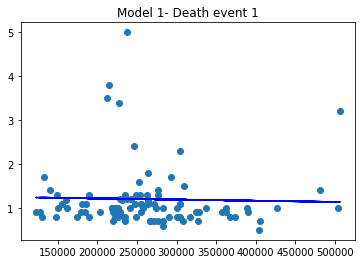

In [48]:
plt.scatter(X_test_1, Y_test_1)
plt.title("Model 1- Death event 1")
plt.plot(X_test_1, Y_pred_1_1, c = 'b')

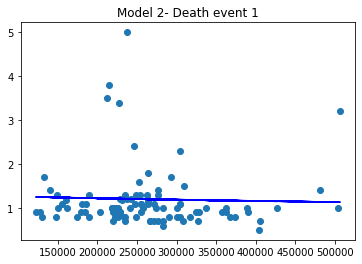

In [49]:
plt.scatter(X_test_1, Y_test_1)
plt.title("Model 2- Death event 1")
plt.plot(X_test_1, Y_pred_2_1, c = 'b')

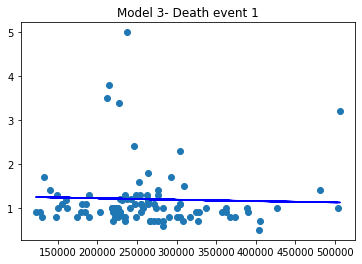

In [50]:
plt.scatter(X_test_1, Y_test_1)
plt.title("Model 3- Death event 1")
plt.plot(X_test_1, Y_pred_3_1, c = 'b')

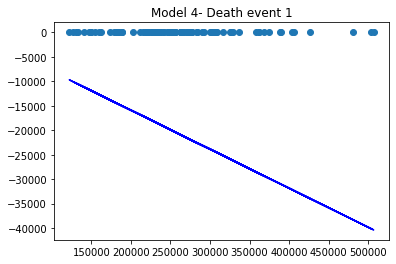

In [51]:
plt.scatter(X_test_1, Y_test_1)
plt.title("Model 4- Death event 1")
plt.plot(X_test_1, Y_pred_4_1, c = 'b')

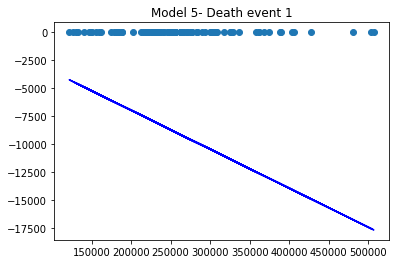

In [52]:
plt.scatter(X_test_1, Y_test_1)
plt.title("Model 5- Death event 1")
plt.plot(X_test_1, Y_pred_5_1, c = 'b')

In [54]:
#For death event = 0
RMSE = mean_squared_error(Y_test, Y_pred_1)
sse_1 = (len(Y_pred_1)*RMSE)**2
print("For model 1- SSE-", sse_1)

RMSE = mean_squared_error(Y_test, Y_pred_2)
sse_2 = (len(Y_pred_2)*RMSE)**2
print("For model 2- SSE-", sse_2)

RMSE = mean_squared_error(Y_test, Y_pred_3)
sse_3 = (len(Y_pred_3)*RMSE)**2
print("For model 3- SSE-", sse_3)

RMSE = mean_squared_error(Y_test, Y_pred_4)
sse_4 = (len(Y_pred_4)*RMSE)**2
print("For model 4- SSE-", sse_4)

RMSE = mean_squared_error(Y_test, Y_pred_5)
sse_5 = (len(Y_pred_5)*RMSE)**2
print("For model 5- SSE-", sse_5)

#For Death event = 1
RMSE = mean_squared_error(Y_test_1, Y_pred_1_1)
sse_1_1 = (len(Y_pred_1_1)*RMSE)**2
print("\n\n\n For model 1- SSE-", sse_1_1)

RMSE = mean_squared_error(Y_test_1, Y_pred_2_1)
sse_2_1 = (len(Y_pred_2_1)*RMSE)**2
print("For model 2- SSE-", sse_2_1)

RMSE = mean_squared_error(Y_test_1, Y_pred_3_1)
sse_3_1 = (len(Y_pred_3_1)*RMSE)**2
print("For model 3- SSE-", sse_3_1)

RMSE = mean_squared_error(Y_test_1, Y_pred_4_1)
sse_4_1 = (len(Y_pred_4_1)*RMSE)**2
print("For model 4- SSE-", sse_4_1)

RMSE = mean_squared_error(Y_test_1, Y_pred_5_1)
sse_5_1 = (len(Y_pred_5_1)*RMSE)**2
print("For model 5- SSE-", sse_5_1)

For model 1- SSE- 1791.9146790568427
For model 2- SSE- 1894.295890930156
For model 3- SSE- 2357.785529144199
For model 4- SSE- 5.714772960217463e+22
For model 5- SSE- 8.073645382580096e+21



 For model 1- SSE- 2233.6877679314193
For model 2- SSE- 2231.0270446894747
For model 3- SSE- 2231.566349955653
For model 4- SSE- 2.2834327625122607e+21
For model 5- SSE- 8.415026046386804e+19


### Question 3: Summarize your results from question 2 in a table like shown below:

In [55]:
d = {
     'Model': ['y = ax + b', 'y = ax2 + bx + c', 'y = ax3 + bx2 + cx + d', 'y = a log x + b', 'log y = a log x + b'],
     'SSE (death event=0)': [sse_1, sse_2, sse_3, sse_4, sse_5],
     'SSE (death event=1)': [sse_1_1, sse_2_1, sse_3_1, sse_4_1, sse_5_1],
}
df_table = pd.DataFrame(data=d)
df_table

,Model,SSE (death event=0),SSE (death event=1)
0,y = ax + b,1.791915e+03,2.233688e+03
1,y = ax2 + bx + c,1.894296e+03,2.231027e+03
2,y = ax3 + bx2 + cx + d,2.357786e+03,2.231566e+03
3,y = a log x + b,5.714773e+22,2.283433e+21
4,log y = a log x + b,8.073645e+21,8.415026e+19


### 1. which model was the best (smallest SSE) for surviving patients? for deceased patients?



For Death event 0- 
Model 1
For Death event 0- 
Model 2

### 2. which model was the worst (largest SSE) for surving patients? for deceased patients?


For Death event 0- 
Model 4
For Death event 0- 
Model 4